In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
file_path = '../../data/raw/greenhouse_gas_inventory_data_completed.csv'
df = pd.read_csv(file_path)
df

,country_or_area,continent,year,value,category
0,Australia,Oceania,2014,393126.947000,CO2 Emissions
1,Australia,Oceania,2013,396913.936500,CO2 Emissions
2,Australia,Oceania,2012,406462.847700,CO2 Emissions
3,Australia,Oceania,2011,403705.528300,CO2 Emissions
4,Australia,Oceania,2010,406200.993200,CO2 Emissions
...,...,...,...,...,...
8401,United States of America,North America,1994,593.222570,Mixed HFCs and PFCs Emissions
8402,United States of America,North America,1993,586.939752,Mixed HFCs and PFCs Emissions
8403,United States of America,North America,1992,574.414624,Mixed HFCs and PFCs Emissions
8404,United States of America,North America,1991,566.900968,Mixed HFCs and PFCs Emissions


In [146]:
uk = df[(df['country_or_area'] == "United Kingdom") & (df['category'] == "CO2 Emissions")].copy()
uk = uk.sort_values(by='year')
uk

,country_or_area,continent,year,value,category
1048,United Kingdom,Europe,1990,596398.4732,CO2 Emissions
1047,United Kingdom,Europe,1991,604652.8969,CO2 Emissions
1046,United Kingdom,Europe,1992,589306.0181,CO2 Emissions
1045,United Kingdom,Europe,1993,574764.7527,CO2 Emissions
1044,United Kingdom,Europe,1994,569458.3649,CO2 Emissions
1043,United Kingdom,Europe,1995,561202.9540,CO2 Emissions
1042,United Kingdom,Europe,1996,582752.7844,CO2 Emissions
1041,United Kingdom,Europe,1997,557608.7794,CO2 Emissions
1040,United Kingdom,Europe,1998,561253.7228,CO2 Emissions
1039,United Kingdom,Europe,1999,553827.5491,CO2 Emissions


In [147]:
# Sao chép DataFrame
uk_sort = uk.copy()

# Lọc dữ liệu theo các cột 'Year' và 'Total'
uk_sort = uk_sort[['year', 'value']]

# Chuyển đổi cột 'Year' thành kiểu datetime
uk_sort['year'] = pd.to_datetime(uk_sort['year'], format="%Y")

# Thiết lập cột 'Year' làm chỉ mục
uk_sort = uk_sort.set_index('year')
uk_sort.head()


,value
year,
1990-01-01,596398.4732
1991-01-01,604652.8969
1992-01-01,589306.0181
1993-01-01,574764.7527
1994-01-01,569458.3649


In [148]:
uk_sort['value'] = np.log(uk_sort['value'])

<Axes: xlabel='year'>

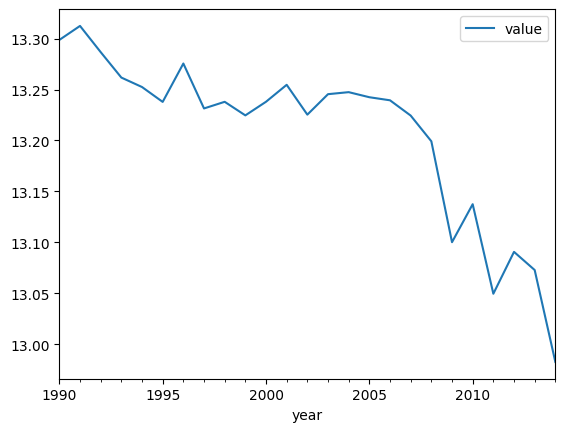

In [149]:
uk_sort.plot()

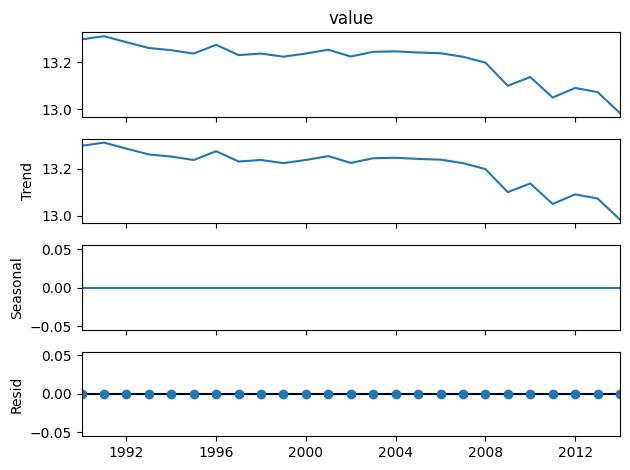

In [150]:
# Perform seasonal decomposition
result = seasonal_decompose(uk_sort['value'], model='additive', period=1)

# Plot decomposition results
result.plot()
plt.show()


In [151]:
train_size = int(len(uk_sort) * 0.8)
train, test = uk_sort.iloc[:train_size], uk_sort.iloc[train_size:]

In [152]:
model = ExponentialSmoothing(train['value'], trend='add', seasonal=None)
fitted_model = model.fit()

# Dự đoán giá trị trên tập test
predictions = fitted_model.forecast(len(test))


c:\Users\VincentPham\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


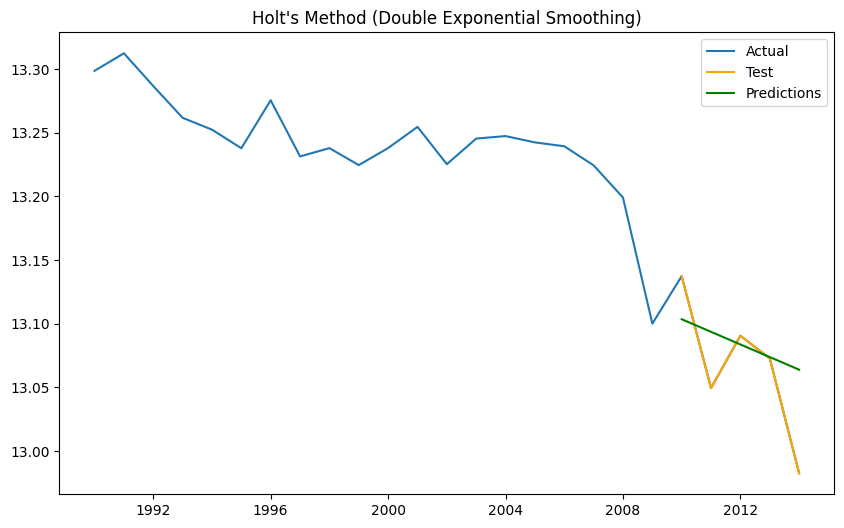

In [153]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(uk_sort.index, uk_sort['value'], label='Actual')
plt.plot(test.index, test['value'], label='Test', color='orange')
plt.plot(test.index, predictions, label='Predictions', color='green')
plt.legend()
plt.title("Holt's Method (Double Exponential Smoothing)")
plt.show()

In [154]:
# Tính MAE
mae = mean_absolute_error(test['value'], predictions)

# Tính MAPE (Sử dụng sklearn)
mape = mean_absolute_percentage_error(test['value'], predictions) * 100

# Tính MSE
mse = mean_squared_error(test['value'], predictions)

# Tính RMSE
rmse = np.sqrt(mse)

r2 = r2_score(test['value'], predictions)
# Hiển thị kết quả
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.033447028191867643
Mean Absolute Percentage Error (MAPE): 0.26%
Mean Squared Error (MSE): 0.0019515055863389835
Root Mean Squared Error (RMSE): 0.04417584845069739
R-squared (R2): 0.24809230975433472


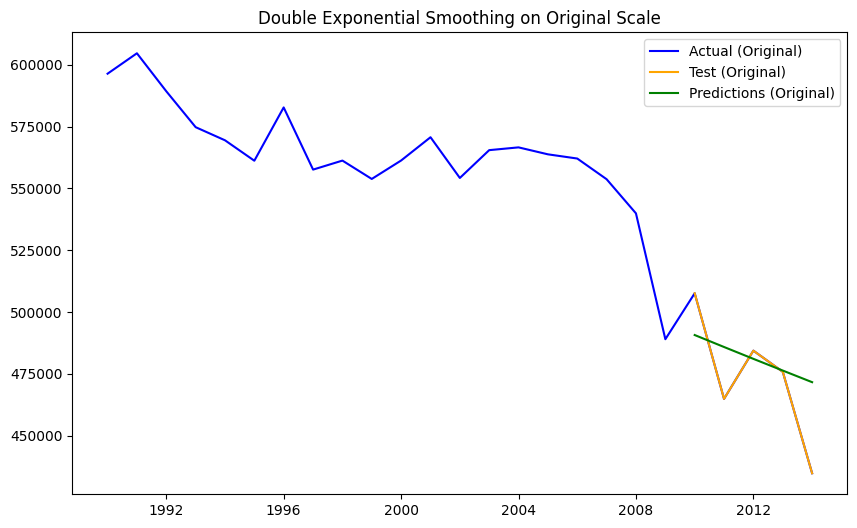

Mean Absolute Error (MAE) - Original Scale: 15705.529050160456
Mean Absolute Percentage Error (MAPE) - Original Scale: 0.03%
Mean Squared Error (MSE) - Original Scale: 418814825.2658273
Root Mean Squared Error (RMSE) - Original Scale: 20464.965801726306
R-squared (R2) - Original Scale: 0.24809230975433472


In [155]:
# Chuyển đổi ngược tất cả các giá trị từ log về giá trị ban đầu
train_original = np.exp(train['value'])
test_original = np.exp(test['value'])
predictions_original = np.exp(predictions)
uk_sort = np.exp(uk_sort['value'])
# Vẽ biểu đồ so sánh trên dữ liệu gốc
plt.figure(figsize=(10, 6))
plt.plot(uk_sort.index, uk_sort, label='Actual (Original)', color='blue')
plt.plot(test_original.index, test_original, label='Test (Original)', color='orange')
plt.plot(test_original.index, predictions_original, label='Predictions (Original)', color='green')
plt.legend()
plt.title("Double Exponential Smoothing on Original Scale")
plt.show()

# Tính các metrics trên giá trị gốc (original scale)
mae_original = mean_absolute_error(test_original, predictions_original)
mape_original = mean_absolute_percentage_error(test_original, predictions_original)
mse_original = mean_squared_error(test_original, predictions_original)
rmse_original = np.sqrt(mse_original)

# Hiển thị các metrics
print(f"Mean Absolute Error (MAE) - Original Scale: {mae_original}")
print(f"Mean Absolute Percentage Error (MAPE) - Original Scale: {mape_original:.2f}%")
print(f"Mean Squared Error (MSE) - Original Scale: {mse_original}")
print(f"Root Mean Squared Error (RMSE) - Original Scale: {rmse_original}")
print(f"R-squared (R2) - Original Scale: {r2}")